In [1]:
import numpy as np
import overfiting_helper as oh
from matplotlib import pyplot as plt

# <center>Overfitting, regularizacion y optimizacion de algoritmos de apredizaje</center>

<img src="images/classif_overfitting.png" alt="Drawing" style="width:60%;"/>

<img src="images/regress_overfitting.png" alt="Drawing" style="width:70%; "/>

# <center>¿Como podemos medir la performance de un algoritmo de apredizaje?<br>(Loss function, Objective function)</center>



### <center>Regresion lineal (Media de error cuadratico): </center>
<center>$J(\theta) = \frac{1}{2m}\sum{_{i=1}^m[h_\theta(x^{(i)})-y^{(i)}]^2}$</center>

<center>$L = \sum{_{i=1}^n[f(x_i; w)-y_i]^2}$</center>
### <center>Regresion logistica (Clasificacion, Cross-entropy):</center>
<center>$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^my^{(i)}logh_\theta(x^{(i)}) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))}]$</center>
### <center>Redes neuronales (Para clasificación):</center>
<center>$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^m\sum{_{k=1}^K}y_k^{(i)}logh_\theta(x^{(i)})_k + (1-y_k^{(i)})log(1-h_\theta(x^{(i)})_k)}]$</center>

### <center>¿Cual es la $h_\theta(x^{(i)})$ en cada caso?</center>


# Notacion:
- $J(\theta)$ ó $L$: Loss function, objective function, cost function
- $x^{(i)}$: Mediciones, variables independientes, features, covariates. Es un vector de dimensión $d$, cada $i$ indica una medición diferente
- $y^{(i)}$: Salida, etiqueta, label, target. La salida $i$-esima corresponde a la entrada $i$-esima
- $m$ ó $n$: Cantidad de mediciones
- $\theta$ ó $w$: Parametros a estimar. Son un total de $d+1$
- $h_{\theta}(x^{(i)})$ ó $f(x_i;w)$: Salida de mi estimador
- $K$: Cantidad de salidas de la red neuronal

# Regresión Lineal (Least-Squares solution)

$f(x_i;w_0, w_1, ..., w_d) = w_0 + w_1x_{i1} + ... + w_dx_{id}$
- **Datos**: Tenemos la data X e Y que queremos modelizar
- **Modelo**: Modelo deterministico; Definimos un modelo lineal
- **Inferencia**: Estimar los parametros $\theta = [w_0, w_1, ..., w_d]$

Loss function or Objective function:

$L = \sum_{i=1}^n{(f(x_i;w_0, w_1, ..., w_d)-y_i)^2}$

Queremos encontrar los valores de $w_i$'s que minimizan esta ecuacion

$w_{LR} = arg \min\limits_{w_i} \sum_{i=1}^n{(f(x_i;w_0, w_1, ..., w_d)-y_i)^2}$

Derivando e igualando a cero se obtienen los parametros (Least-Squares solution) - Notacion matricial

### Ecuación normal

$w_{LS} = (X^TX)^{-1}X^Ty$

$\hat{y} = Xw_{LS}$

donde:


$\hat{y} = \begin{bmatrix} \hat{y}_{0} \\\hat{y}_{1}\\.\\.\\ \hat{y}_{n} \\ \end{bmatrix}$,
$X=\begin{bmatrix}
    1       & x_{11} & x_{12} & \dots & x_{1d} \\
    1       & x_{21} & x_{22} & \dots & x_{2d} \\
    \dots \\
    1       & x_{n1} & x_{n2} & \dots & x_{nd}
\end{bmatrix}$, 
$w_{LS} = \begin{bmatrix} w_{0} \\w_{1}\\.\\.\\ w_{d} \\ \end{bmatrix}$

En notacion matricial:

$L = \|\hat{y}-y_i\|^2$

In [2]:
def solve_LR(X,y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def get_prediction(X,w):
    return X.dot(w)

def get_loss_function(X,y,w):
    error = get_prediction(X,w)-y
    return (error**2).sum()/(2*len(y))

# Ejemplo 1: Regresion lineal (d=1)
$y = w_0 + w_1x$

valores reales: [2, 2]
valores estimados: [ 1.95770714  2.02970905]
loss function en w_est: 0.0365187787706


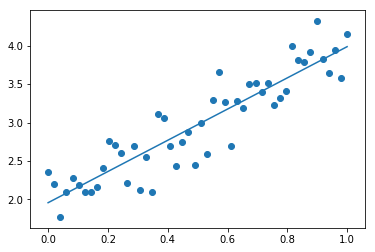

In [4]:
w0 = 2; w1 = 2; N = 50
x = np.linspace(0,1,N)
y = w0 + w1*x + np.random.normal(0,0.3, len(x))#.reshape(len(x),1)
plt.scatter(x,y)

X = np.ones((x.shape[0],2))
X[:,1] = x.flatten()
w_est = solve_LR(X,y)
y_est = get_prediction(X,w_est)
print('valores reales:',[w0, w1])
print('valores estimados:',w_est)
print('loss function en w_est:', get_loss_function(X,y,w_est))
plt.plot(x, y_est)
plt.show()

### Fijo uno de los pesos y grafico la funcion de costo

[ 1.95770714  2.02970905]


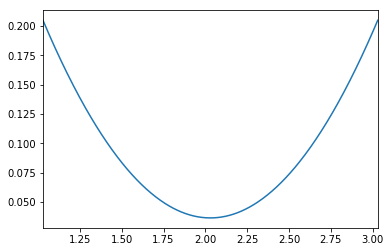

In [5]:
def plot_loss_func(X,y,w):
    w_cp = w.copy()
    w1_var = np.linspace(w[1]-1,w[1]+1,500)
    loss_func = []
    for w1 in w1_var:
        w_cp[1] = w1
        loss_func.append(get_loss_function(X,y,w_cp))
    plt.plot(w1_var, loss_func)
    print(w)
    plt.xlim(w[1]-1,w[1]+1)
    
    plt.show()
plot_loss_func(X,y,w_est)

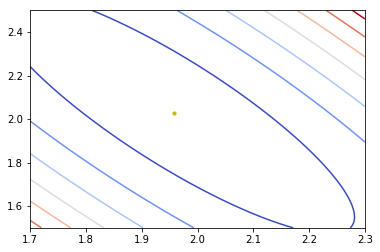

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_loss_function(X, y, w0_est, w1_est, w0_range = [0,2], w1_range = [0, 4], N = 101, loss_fn = get_loss_function):
    y = y.reshape(len(y),1)
    w0s = np.linspace(*w0_range, N)
    w1s = np.linspace(*w1_range, N)
    loss_fuction = np.zeros((N,N))
    for iw0, w0 in enumerate(w0s):
        for iw1, w1 in enumerate(w1s):
            ws = np.array([[w0],[w1]])
            loss_fuction[iw0,iw1] = loss_fn(X,y, ws) 
    fig = plt.figure()
    #ax = fig.gca(projection='3d')
    Xp, Yp = np.meshgrid(w0s, w1s)
    w_est = np.array([[w0_est],[w1_est]])
    loss_est = loss_fn(X,y, w_est)
    plt.contour(Xp, Yp, loss_fuction.T, cmap=cm.coolwarm)
    plt.scatter(w_est[0],w_est[1], color='y', s = 10)
    
plot_loss_function(X, y, w_est[0], w_est[1], w0_range = [1.7,2.3], w1_range = [1.5, 2.5], N = 101) #loss_fn = get_loss_function)
plt.show()

### ¿Podría este problema resolverse con "Batch" Gradient Descent?
### ¿Por que no resolverlo siempre en forma matricial?

$J(\theta) = \frac{1}{2m}\sum{_{i=1}^m[h_\theta(x^{(i)})-y^{(i)}]^2}$

$\theta_j = \theta_j - \alpha\frac{1}{n}\sum_{i=0}^n(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_j$

# Ejemplo 2: Regression polinomial y overfitting

$f(x_i;w_0, w_1, ..., w_n) = w_0 + w_1x_{i1} + ... + w_dx_{id}$

$x_{i1} = x, x_{i2} = x^2, ..., x_{id} = x^d$

$f(x_i;w_0, w_1, ..., w_d) = w_0 + w_1x + w_2x^2 + ... + w_dx^d$

### ¿Cual de los polinomios es el que mejor se ajusta?

In [7]:
%%HTML
<center><video width="640" controls><source src="images/overfitting_regression.mp4" type="video/mp4"></video></center>

### ¿Dados más datos, cual es el que mejor se ajusta?

<img src="images/linear_with_testset.png" alt="Drawing"/>

<img src="images/train_and_test_MSE.png" alt="Drawing"/>

# Overfiting:
### Cuando el numero de parametros es alto en comparción con la cantidad de mediciones 

## $n$ NO es mucho mayor que $d$ 

### ¿En este caso?

<img src="images/sqr_with_testset.png" alt="Drawing"/>

<img src="images/train_and_test_sqr_MSE.png" alt="Drawing"/>

# ¿Es siempre posible determinar manualmente la cantidad de parametros del modelo?

- En el caso polinomial, la cantidad de opciones de modelos no es tan grande
- En la practica, la mayoria de las veces es imposible probar todos los modelos
- En este caso solo dependia de una variable, que pasa si depende de N variables? 
- Cuantas combinaciones necesitariamos probar? Si ademas intentamos combinaciones polinomiales, esto crece mas todavia.
- En este caso tambien, se podia resolver a traves de la ecuacion normal. Muchas veces eso no es posible y hay que usar metodos iteraticos que pueden llevar horas, dias o mas en converger.

# ¿Cuál es la solucion?: Regularización

### Pesos del ejemplo de polinomio de orden 9

<img src="images/weights_example.png" alt="Drawing"/>

- Los pesos tienen valores muy grandes
- Podemos restringir los valores de los pesos modificando la funcion de costo


$L = ||\hat{y}-y_i||^2 + \lambda g(w)$

donde:

$\lambda > 0$ y $g(w)$ una funcion que penalizara ciertos valores de $w$

#### Nota importante: Normalmente estos modelos requieren normalización

## Ridge regression (L2 regularization)
- Restringe los valores altos de $w$ todos por igual

$w_{RR} = arg \min\| \hat{y}-y_i \|^2 + \lambda \|w\|^2$

$w_{RR} = (\lambda I + X^TX)^{-1}X^Ty$

## LASSO (L1 regularization)
### (Least Absolute Shrinkage and Selection Operator)
- Selector de parametros

$w_{RR} = arg \min\| \hat{y}-y_i \|^2 + \lambda \|w\|$

## ElasticNet
-  Combinacion de L1y L2

### Otros tipos:

$w_{RR} = arg \min\| \hat{y}-y_i \|^2 + \lambda \|w\|^d$

- L0 cuenta la cantidad de $w$'s distinto de cero
- Si d esta entre 0 y 1 aumenta la esparcibidad (sparsity) pero la funcion de costo no es convexa

# Ejemplo:
# Se aplicaran 3 modelos para el caso polinomial:
- ### Regresion lineal
- ### Ridge
- ### Lasso

$y = 0.4x^3 + 0.2x^4 + N$

$\sigma_N^2 = 0.075$

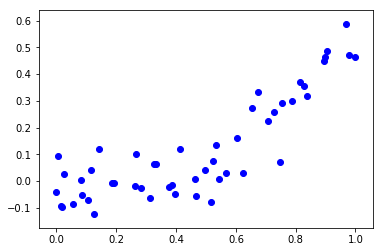

In [8]:
N= 200

X_LS_2, Y_LS_2, X_LS_test_2, Y_LS_test_2 = oh.get_polynomial_set([0,0,0, 0.4, 0.2], mean = 0, sigma = 0.075, N = N, ratio = 0.25)

plt.scatter(X_LS_2, Y_LS_2, color = 'b')
#plt.scatter(X_LS_test, Y_LS_test, color = 'y')
plt.show()

# Regresion lineal

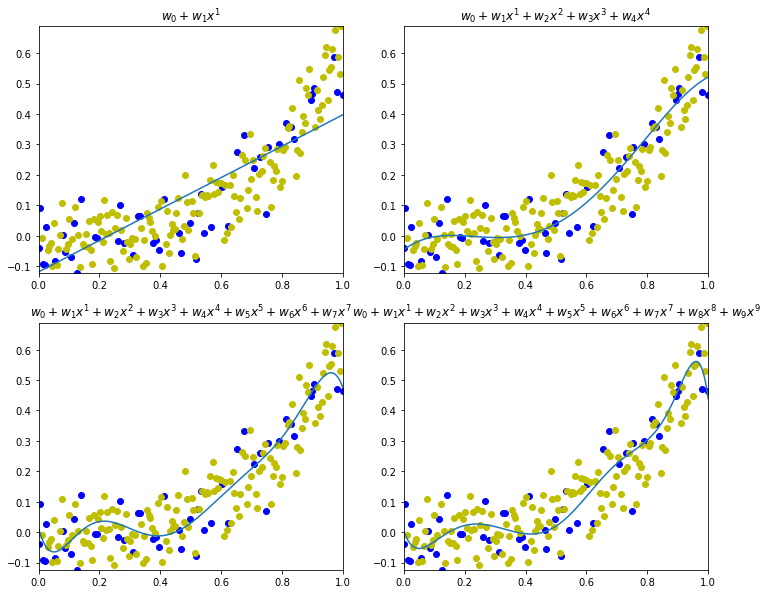

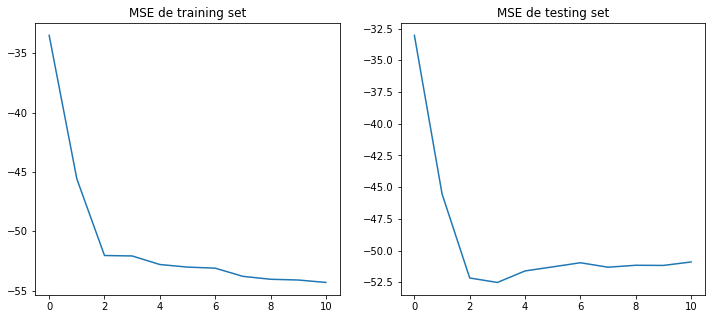

In [9]:
orders = [1,4,7,9]
max_order = 10
MSEs_2, MSEs_test_2 = oh.get_plot_polinomial_estimations(X_LS_2, Y_LS_2, X_LS_test_2, Y_LS_test_2, model = oh.get_parameters_polinomial_model_linear, N=N, orders = orders, normalize = True, max_order = max_order, plot_test = True)
oh.plot_MSEs([MSEs_2], [MSEs_test_2])

### Se puede ver en la grafica superior "MSE de testing set" como se produce overfitting

# Ridge

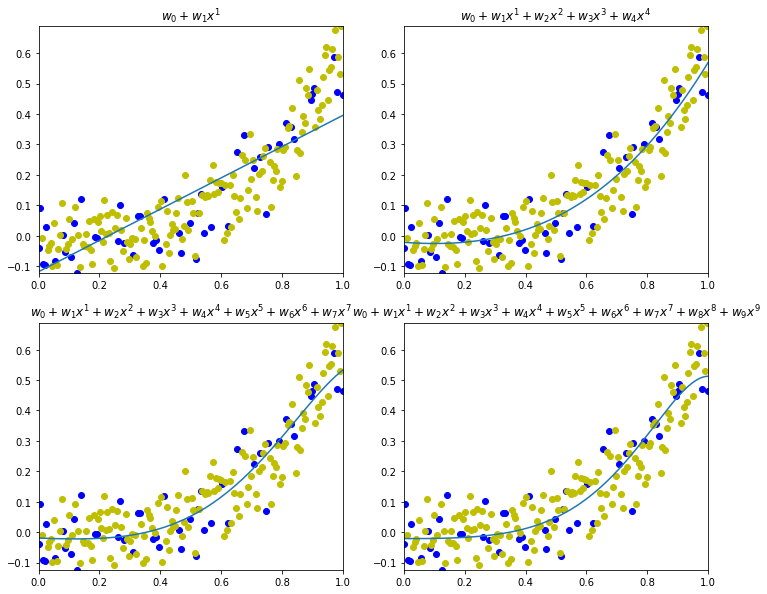

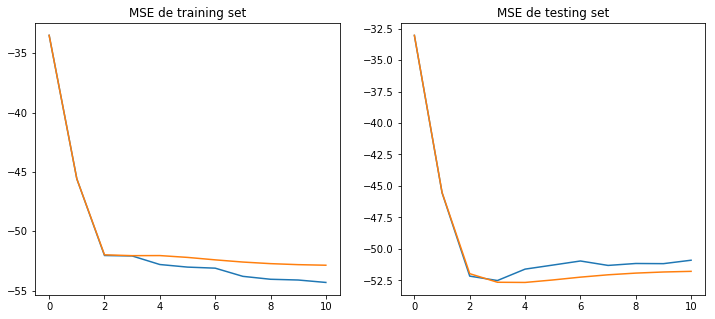

In [10]:
lamb_RR = 0.25
MSEs_RR, MSEs_test_RR = oh.get_plot_polinomial_estimations(X_LS_2, Y_LS_2, X_LS_test_2, Y_LS_test_2, model=oh.get_parameters_polinomial_model_linear, N=N, orders = orders, lamb = lamb_RR, normalize = True, max_order = max_order, plot_test = True)
oh.plot_MSEs([MSEs_2, MSEs_RR], [MSEs_test_2, MSEs_test_RR])

# Lasso

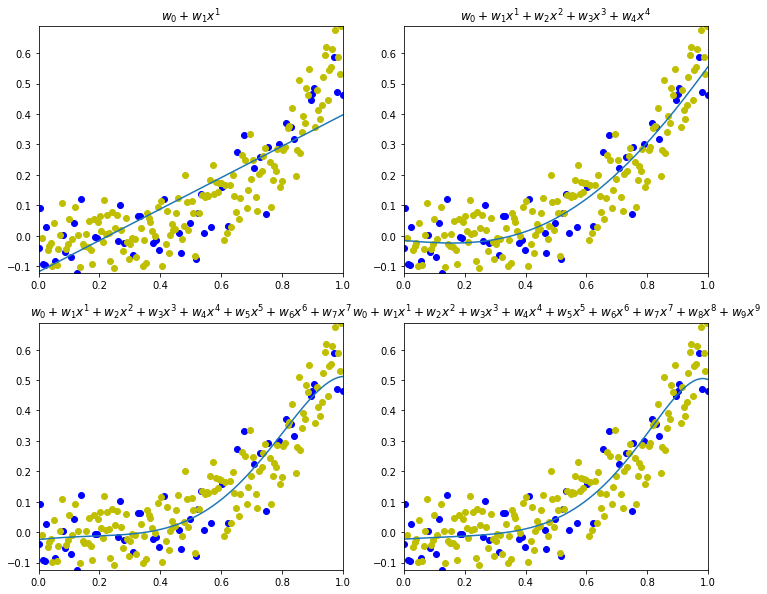

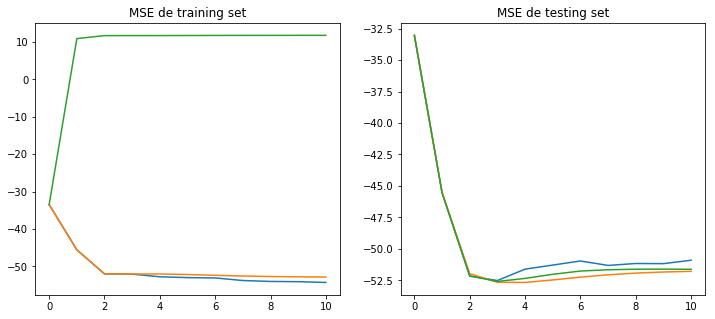

In [11]:
import importlib
importlib.reload(oh)
lamb_LASSO = 0.0001
MSEs_LASSO, MSEs_test_LASSO = oh.get_plot_polinomial_estimations(X_LS_2, Y_LS_2, X_LS_test_2, Y_LS_test_2, model = oh.get_parameters_polinomial_model_lasso,N=N, orders = orders, lamb = lamb_LASSO, normalize = True, max_order = max_order, fit_intercept=False)
oh.plot_MSEs([MSEs_2, MSEs_RR, MSEs_LASSO], [MSEs_test_2, MSEs_test_RR, MSEs_test_LASSO])

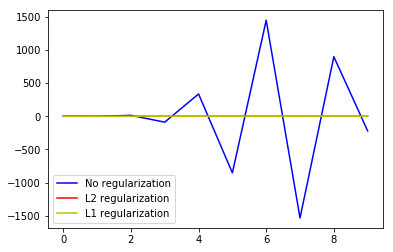

No regularization: 6156386.5196 [[  1.18779541e-01]
 [ -8.47990335e-01]
 [  1.38099259e+01]
 [ -8.89028104e+01]
 [  3.36644894e+02]
 [ -8.53753009e+02]
 [  1.44861348e+03]
 [ -1.53341202e+03]
 [  8.98640723e+02]
 [ -2.20632744e+02]]
l2 regularization: 0.0402676407025 [[ 0.1181886 ]
 [-0.00044555]
 [ 0.014238  ]
 [ 0.06461061]
 [ 0.08388561]
 [ 0.07226044]
 [ 0.04254721]
 [ 0.00426798]
 [-0.03743128]
 [-0.08021033]]
l1 regularization: 0.0843744398019 [ 0.11867954  0.01874172 -0.0278974  -0.          0.22115192  0.07286364
  0.          0.         -0.         -0.12224078]


In [12]:
ws_11, _,_,_= oh.get_parameters_polinomial_model(X_LS_2,Y_LS_2, N = 9, lamb = 0, normalize = True)
ws_11_l2, _,_,_= oh.get_parameters_polinomial_model(X_LS_2,Y_LS_2, N = 9, lamb = lamb_RR, normalize = True, fit_intercept=False)
ws_11_l1, y_lasso,mean,std= oh.get_parameters_polinomial_model_lasso(X_LS_2,Y_LS_2, N = 9, lamb = lamb_LASSO, normalize = True, fit_intercept=False)
plt.plot(range(len(ws_11)),ws_11,color='b',label='No regularization')
plt.plot(range(len(ws_11)),ws_11_l2, color='r',label='L2 regularization')
plt.plot(range(len(ws_11)),ws_11_l1, color='y',label='L1 regularization')
plt.legend(loc='lower left')
plt.show()
print('No regularization:',(ws_11**2).sum(), ws_11)
print('l2 regularization:',(ws_11_l2**2).sum(), ws_11_l2)
print('l1 regularization:',(ws_11_l1**2).sum(), ws_11_l1)

- ### ¿Cuando utilizo cada uno?
- ### ¿Que pasa en los differentes casos con lambda?
- ### ¿Que pasa con el update en Gradient descent?
    - Lasso (coordinate descent)

# Formalizacion Regresion de Ridge

# MLE (Maximun Likelihood Estimation)

Dada una secuencia de muestras $x_1,x_2, ..., x_n$, queremos encontrar los paramatros $\theta$ que maximizan la funcion de densidad de probabilidad evaluada en cada una de nuestras muestras $x_1,x_2, ..., x_n$:

$\hat\theta = arg \max\limits_{\theta} p(x_1, x_2, ..., x_n|\theta)$

Suponemos que las muestras de X fueron generadas i.i.d (Independientes e Identicamente Distribuidas)

$
\hat\theta = arg \max\limits_{\theta} p(x_1|\theta) p(x_2|\theta) ... p(x_n|\theta)$

Tenemos que derivar e igualar a cero respecto a cada parametro para encontrar el minimo, es decir, igualar el gradiente a cero:

$\nabla_\theta \prod p(x_i\mid\theta) = 0$

**log-lokilihood**: Un detalle a tener en cuenta es que la productoria se puede reemplazar por una suma aplicando logaritmo que es una funcion monotona creciente por lo que no cambiaria el minimo. 

# Gaussiana multivariable

- **Datos**: Tenemos la data X que queremos modelizar
- **Modelo**: Modelo probabilistico; Definimos que el modelo para X es una V.A Gaussiana con parametros $\theta = [\vec{\mu}$, $\Sigma$] 
- **Inferencia**: Estimar los parametros del modelo propuesto

Si resolvemos, obtendremos lo siguiente:

$\hat\mu_{ML} = \frac{1}{n} \sum_{i=1}^n{x_i}$

$\hat\Sigma_{ML} = \frac{1}{n} \sum_{i=1}^n{(x_i-\hat\mu_{ML})(x_i-\hat\mu_{ML})^T}$

Este modelo encuentra los valores de los parametros en funcion de las muestras, pero considera a los parametros as u vez como V.A. Si calculamos sus medias, obtendremos:

$\mathbb{E}[\hat\mu_{ML}] = \vec{\mu}$ 

$\mathbb{E}[\hat\Sigma_{ML}] = \frac{N-1}{N}\Sigma$ 

**Nota**: En este caso con ML obtenemos un estimador no polarizado para la media y uno polarizado para la matriz de covarianza

## Ejemplo con gausiana de una variable

In [13]:
# Defino V.A X con distribucion gaussiana de media cero y varianza 1
samples = 10000; mu = 0; var = 1
X_ML = np.random.normal(mu,var,samples)

# Media y varianza estimadas:
mu_est = X_ML.mean(); var_est = X_ML.var()
print('media:',mu_est, '- varianza:',var_est)

media: 0.00931016082367 - varianza: 0.984344364129


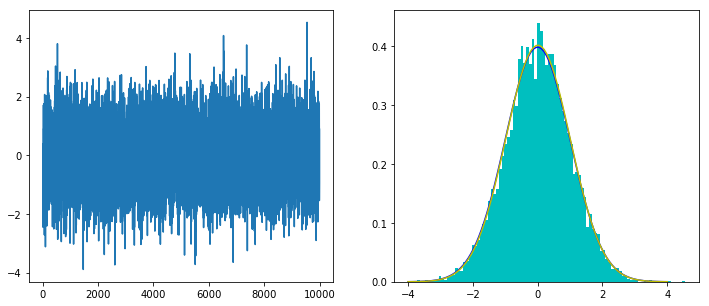

In [14]:
# Grafico muestras e histograma para analizarlas
lin, gauss_teorica = oh.gaussian(mu, var, -4, 4, 100)
lin, gauss_est = oh.gaussian(mu_est, var_est, -4, 4, 100)
bins = 100; f, ([ax1, ax2]) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(12, 5))
ax1.plot(X_ML); ax2.hist(X_ML,bins, normed=1, color = 'c'); ax2.plot(lin, gauss_teorica, color = 'b'); 
ax2.plot(lin, gauss_est, color = 'y');
plt.show()

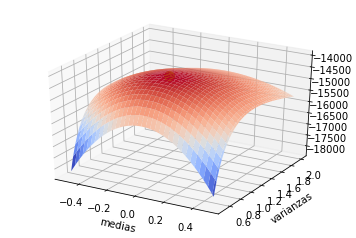

In [15]:
mus, variances, likelihood = oh.plot_likelihood(X_ML, mu_est, var_est)
plt.show()

### Maximum Likelihood (vision probabilistica de Least-Squares)

Si suponemos una densidad de probabilidad conjunta en n dimensiones con: 

$\Sigma = \sigma^2I$ y media $\mu = Xw$

$p(y\mid\mu,\sigma^2) = \frac{1}{(2\pi\sigma^2)^{n/2}}exp(-\frac{1}{2\sigma^2}(y-\mu)(y-\mu)^T)$

Donde no conocemos $w$ que es el **ground truth**

Ahora encontremos el **Maximun Likelihood** de $p(y|\mu,\sigma^2)$ con el vector w como parametro, es decir, el valor del vector w que maximiza la funcion $p(y|\mu,\sigma^2)$

$w_{ML}= arg \max\limits_{w} ln(p(y\mid\mu = Xw,\sigma^2))$

desarrolando queda:

$w_{ML}= arg \max\limits_{w} -\frac{1}{2\sigma^2}\| y-Xw \| ^2 $

$w_{LS}= arg \min\limits_{w} \| y-Xw \| ^2 $

Misma solucion que LS (Least Squares)

Distintas formas de ver el modelo:
- $y_i = x_i^Tw + \epsilon_i$, donde $\epsilon_i$ son V.A gaussianas i.i.d con media zero y varianza $\sigma^2$ -> $N(0,\sigma^2)$
- $y_i$ son V.A independientes con distribucion $N(x_i^Tw,\sigma^2)$
- $y$ es $N(Xw,\sigma^2I)$, notacion matricial

Recordar que $w_{ML}$ es una V.A que estimamos segun la ecuacion superior. Como V.A, tiene una media y una varianza. Es decir, las medias estimadas $Xw_{ML}$ **no** son iguales a $Xw$

En otras palabras, segun este modelo, nosotros estimamos $w_{ML}$ en funcion de muestrar $y$. Si volvemos a muestrar $y$, obtendremos valores $w_{ML}$ diferentes. Si esto lo hacemos "infinitas veces", entonces la media sera $w$ debido a que $w_{ML}$ es un estimador no polarizado:

$\mathbb{E}[w_{ML}] = \mathbb{E}[(X^TX)^{-1}X^Ty] = (X^TX)^{-1}X^T\mathbb{E}[y] = (X^TX)^{-1}X^TXw = w$

$Var[w_{ML}] = \sigma^2(X^TX)^{-1}$ 


# MAP solution

Hipotesis:

- $y$ es $N(Xw,\sigma^2I)$
- $w$ es $N(0,\lambda^{-1}I)$ 

$w_{MAP}= arg \max\limits_{w} ln(p(w\mid y,X))$

$w_{MAP}= arg \max\limits_{w} ln( \frac{p(y\mid w,X) p(w)}{p(y | X)} )$

Reemplazando

$w_{ML}= arg \max\limits_{w} -\| y-Xw \|^2 - \sigma^2 \lambda + constante$

### Conclusiones
- ##### La misma funcion que en L2 pero negativa, por eso se maximiza
- ##### Ridge y MAP son equivalentes
- ##### Es un estimador no polarizado, por lo que la media no converge al valor de los $w$'s, pero su varianza es menor al del MAP

# Regresión Logística (Clasificación)

<center>$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^my^{(i)}logh_\theta(x^{(i)}) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))}]$</center>

### ¿Por que se suele usar cross-entropy promedio y no el MSE?

<img src="images/logistic_regression_prob.png" alt="Drawing" style="width:70%; "/>


- ##### Sale de aplicar MAP a la ecuacion superior
- ##### Es interesante resolver y verificar que el update del Gradient Descent es igual al de la regresion lineal
<img src="images/logistic_regression_gd.png" alt="Drawing" style="width:70%; "/>


# Funcion de costo en funcion de $w$

<img src="images/cross_entropy_vs_MSE.png" alt="Drawing" style="width:70%; "/>

<img src="images/cross_entropy_vs_MSE_zoom.png" alt="Drawing" style="width:70%; "/>


Las tecnicas de regularizacion son iguales a Regresion lineal

# Redes neuronales
### Tecnicas especificas

- Dropout: omitir aleatoriamente ciertas neuronas (50%). Genera redundancia y evita overfiting
- weight constrain: penaliza al vector de pesos por capa. Por ejemplo que su suma al cuadrado no supere cierto valor. Si lo supera, se bajan todos los valores en un factor
- Agregar ruido en la entrada, en los pesos o en las funciones de activacion

# - Training set
# - Cross validation set
# - Test set
# - k-folding

# Regularizacion y funciones de costo durante entrenamiento

In [16]:
from sklearn import model_selection
import classifier_helper as CH
import importlib
importlib.reload(CH)
data = np.loadtxt('ex2data2.txt', delimiter = ',', skiprows=0)
X_tot = data[:,:2]
y_tot = data[:,2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_tot,y_tot, train_size=0.8)
y_train = np.array(y_train)

C:\Users\sutto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


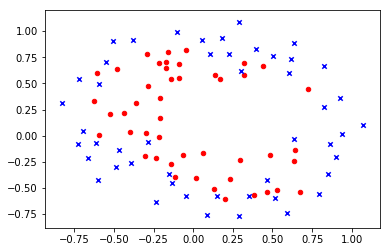

In [17]:
CH.plot_it(X_train,y_train, s = 20)
plt.show()

0.86170212766


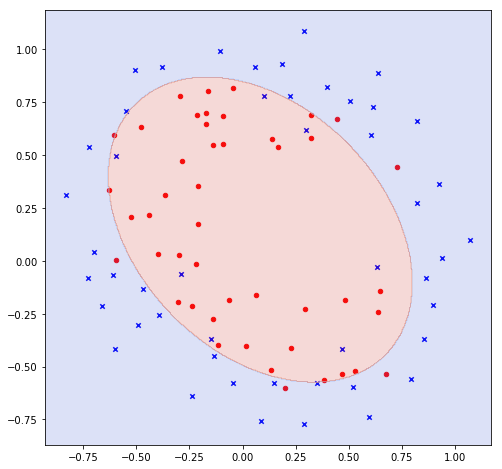

In [18]:
importlib.reload(CH)
CH.plot_region(X_train,y_train, degree=2)
plt.show()

In [19]:
import tensorflow as tf
import time
degree = 10
X_mat = CH.get_polynimial_set(X_train, degree = degree)
X_mat_test = CH.get_polynimial_set(X_test, degree = degree)

In [20]:
W_tf = tf.Variable(np.random.normal(0,0.0000001,(X_mat.shape[1],1)), tf.float32)

X_tf = tf.placeholder(tf.float64, [None,X_mat.shape[1]])
X_test_tf = tf.placeholder(tf.float64, [None,X_mat_test.shape[1]])

y_ = tf.placeholder(tf.float64, [y_train.shape[0],1])
y_test_ = tf.placeholder(tf.float64, [y_test.shape[0],1])

y_est_tf = tf.sigmoid(tf.matmul(X_tf, W_tf))
y_est_test_tf = tf.sigmoid(tf.matmul(X_test_tf, W_tf))

tolerance = 1e-20
clipped_y = tf.clip_by_value(y_est_tf, tolerance, 1.0)
clipped_1_y = tf.clip_by_value(1-y_est_tf, tolerance, 1.0)

clipped_y_test = tf.clip_by_value(y_est_test_tf, tolerance, 1.0)
clipped_1_y_test = tf.clip_by_value(1-y_est_test_tf, tolerance, 1.0)

cross_entropy = tf.reduce_mean(-(y_ * tf.log(clipped_y) + (1-y_)*tf.log(clipped_1_y)))
cross_entropy_test = tf.reduce_mean(-(y_test_ * tf.log(clipped_y_test) + (1-y_test_)*tf.log(clipped_1_y_test)))

train_step = tf.train.AdamOptimizer(1).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()

0.230324353526
1.01085675773


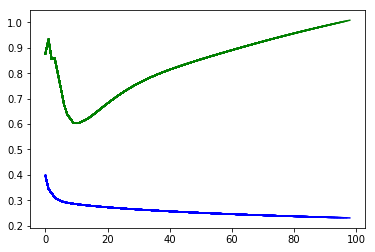

In [21]:
%matplotlib inline
from IPython import display

sess.run(init)
accur_vect = []
loss_vect = []
loss_vect_test = []
print('started')
for i in range(1000):
    sess.run(train_step, {X_tf:X_mat, y_: y_train.reshape(y_train.shape[0],1)})
    if (i!=0)&(i%10==0):
        ce, ce_test, y_estim = sess.run([cross_entropy, cross_entropy_test, y_est_tf], 
                                        {X_tf:X_mat, y_: y_train.reshape(y_train.shape[0],1), X_test_tf:X_mat_test, y_test_: y_test.reshape(y_test.shape[0],1)})
        acc = (1-abs((1*(y_estim>0.5))-y_train.reshape(y_train.shape[0],1)).sum()/y_train.shape[0])
        accur_vect.append(acc)
        loss_vect.append(ce)
        loss_vect_test.append(ce_test)
        #print(i, ce, acc)
        try:
            #f,([ax1, ax2]) = plt.subplots(1,2, sharex=False, sharey=False)
            plt.plot(loss_vect, color='b')
            plt.plot(loss_vect_test, color='g')
            #plot_classifier(X_mat, y, predict_y, degree, N=100)
            display.display(plt.gcf())
            display.clear_output(wait=True)
            #time.sleep(1)
        except KeyboardInterrupt:
            break

print(sess.run(cross_entropy, {X_tf:X_mat, y_: y_train.reshape(y_train.shape[0],1)}))
print(sess.run(cross_entropy_test, {X_test_tf:X_mat_test, y_test_: y_test.reshape(y_test.shape[0],1)}))
Weights = sess.run(W_tf, {X_tf:X_mat, y_: y_train.reshape(y_train.shape[0],1)})

In [22]:
def predict_y(X):
 return sess.run(y_est_tf, {X_tf:X})>0.5

def getScore(X, y):
    return (1-abs((1*predict_y(X))-y.reshape(y.shape[0],1)).sum()/y.shape[0])


0.925531914894
0.75


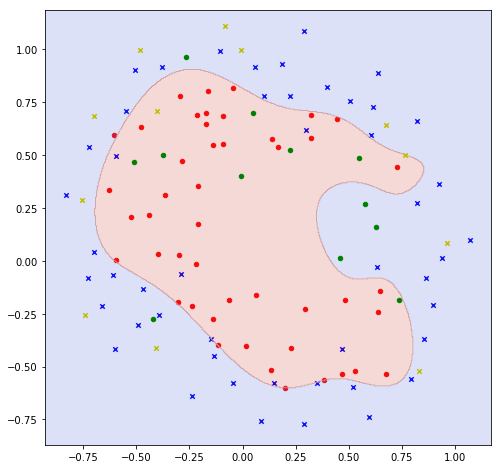

In [23]:
print(getScore(X_mat, y_train))
print(getScore(X_mat_test, y_test))
CH.plot_classifier(X_mat, y_train, predict_y, degree, N=500)
CH.plot_it(X_test,y_test, s = 20, colors = ['g','y'])

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def estimated_y(X, w):
    prod = X.dot(w)
    prod_clip = np.clip(prod, -200, 200)
    return sigmoid(prod_clip)

def get_entropy(y_,y_est):
    tolerance = 1e-20
    clipped_y = np.clip(y_est, tolerance, 1.0)
    clipped_1_y = np.clip(1-y_est, tolerance, 1.0)
    return (-(y_*np.log(clipped_y) + (1-y_)*np.log(clipped_1_y))).mean()

def get_MSE(y_,y_est):
    return ((y_ - y_est)**2).mean()

In [25]:
def get_ent(X,y,w):
    print(get_entropy(y.reshape(y.shape[0],1), estimated_y(X, w)))
get_ent(X_mat, y_train,Weights)
get_ent(X_mat_test, y_test,Weights)
#print(get_entropy(y_test.reshape(y_test.shape[0],1), estimated_y(X_mat_test, Weights)))

0.230324353526
1.01085675773
